# Week 7 Data Modeling - Linear Models & Generalized Linear Models

Week 7 reading: **Pandas for Everyone** chapters 12 - 13 (pages 243 - 264)

Outline:

* Chapter 12 - Linear Models
    1. Visualization - matplotlib and seaborn
    2. What does "Linear Model" really mean?

* Chapter 13 - Generalized Linear Models
    1. Things
    
## Overview

Up to this point, we have looked at data wrangling as an end unto itself, used simply to get the data into a better form or format for visual inspection and then left it there. But, generally we are doing data wrangling with the end-goal of creating some type of analytic or predictive model, often using the **sklearn** library (although many other libraries also exist for modeling purposes).

This week we will first look at some visualization methods using the **matplotlib** and **seaborn** libraries and then discuss the most common type of model, the **linear regression**, along with some graphing to add depth to the discussion in **Pandas for Everyone**.

## 1. Visualization - matplotlib and seaborn

The subject of visualization in data science is much too big for the space we have here but learning some basics will serve you well and help point the way to more advanced usage. 

### Matplotlib

The most "universal" data plotting library in Python is called `matplotlib`. It is a **very** powerful library with a ton of options and abilities but like most powerful software, it can be a tad bit confusing to use. I recommend looking at some of DataCamp's tutorials about matplotlib and definitely get their [matplotlib cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

Just like we use **pd** as an alias for Pandas and **np** as an alias for Numpy, the accepted alias for matplotlib is **plt**. 

### Magic

Jupyter notebooks have special commands called "magic" that perform special functions. Some very useful magics:

* %time
* %timeit
* %matplotlib inline

The first two are concerned with timing lines of code or entire cells but the third magic is the one we are most interested in. `%matplotlib inline` tells the jupyter notebook to show graphs on the notebook page.

Let's make a quick scatter plot:


In [28]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext birdseye

The birdseye extension is already loaded. To reload it, use:
  %reload_ext birdseye


In [29]:
# First, let's have 50 x-values
x = np.random.randint(low=0, high=1000,size=50)
x

array([266, 770, 798, 999, 238, 362, 976, 564, 769, 357, 487, 894, 420,
       536, 713, 612, 606, 261, 297, 593, 368, 700, 842, 129, 380, 811,
        57, 107, 536, 760, 419, 271, 600, 873, 208, 353,  36, 642, 965,
       867, 808, 500,  36, 312, 279, 208, 447, 306, 236, 188])

In [30]:
# Now, let's generate some y-values
y = 2 * x - 5 + np.random.randint(low=0, high=1000,size=50)
y

array([ 879, 1927, 1925, 2013, 1184, 1085, 2945, 1532, 1812, 1480, 1020,
       2296, 1108, 1630, 2046, 1533, 1929,  826,  836, 2101, 1129, 2061,
       2250, 1179, 1151, 2033,  870,  782, 1108, 1529, 1551, 1258, 1656,
       2427,  983,  806,  280, 1427, 2433, 2687, 1816, 1619,  815,  683,
        782,  650, 1444, 1235,  632, 1345])

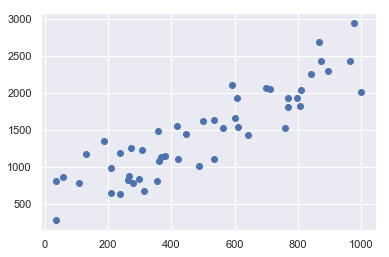

In [31]:
# And then a simple plot
plt.scatter(x,y);

That plot is OK but doesn't look that great, so let's bring in another plotting library -- just for formatting, now. We will do more with it in a bit.

In [32]:
import seaborn as sns
sns.set()               # Makes graphs prettier

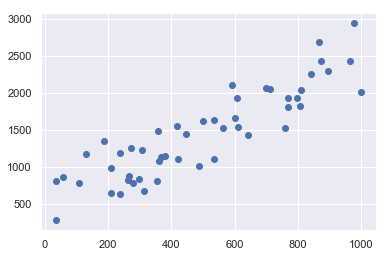

In [33]:
plt.scatter(x,y)

## Seaborn

The seaborn library is built on top of matplotlib and significantly simplifies creating more complex graphs. We will use seaborn to do some preliminary analysis on a "real" example data set in a few minutes. Just like `matplotlib` above, I encourage you to go get the [Datacamp Seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

Seaborn is smart enough to get data out of a dataframe, provided you tell it which columns go on the axes. We will use the `zip()` function to create a list of tuples then make a dataframe.

In [34]:
import pandas as pd
data = list(zip(x,y))
df = pd.DataFrame(data,columns=['x','y'])
df.head()

,x,y
0,266,879
1,770,1927
2,798,1925
3,999,2013
4,238,1184


Seaborn has a `scatterplot()` function and also a `relplot()` function that "relates" two variables. The `relplot()` default is to use a scatterplot:

In [35]:
?sns.relplot

Signature:
sns.relplot(
    ['x=None', 'y=None', 'hue=None', 'size=None', 'style=None', 'data=None', 'row=None', 'col=None', 'col_wrap=None', 'row_order=None', 'col_order=None', 'palette=None', 'hue_order=None', 'hue_norm=None', 'sizes=None', 'size_order=None', 'size_norm=None', 'markers=None', 'dashes=None', 'style_order=None', "legend='brief'", "kind='scatter'", 'height=5', 'aspect=1', 'facet_kws=None', '**kwargs'],
)
Docstring:
Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions
that show the relationship between two variables with semantic mappings
of subsets. The ``kind`` parameter selects the underlying axes-level
function to use:

- :func:`scatterplot` (with ``kind="scatter"``; the default)
- :func:`lineplot` (with ``kind="line"``)

Extra keyword arguments are passed to the underlying function, so you
should refer to the documentation for each to see kind-specific options.

The relationshi

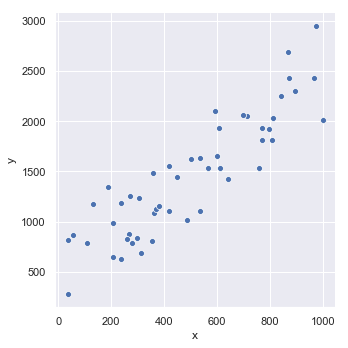

In [36]:
sns.relplot(x='x', y='y',data=df)

## 2. What does "Linear Model" really mean?

Before we go too far down the rabbit hole of visualization, let's take a moment and discuss *why* we are doing all this work.

First of all, why do I keep using this word, "model?" A model is a mathematical relationship between the observed features and the outcome. Ultimately, we want to be able to feed any set of unlabeled, unanalyzed feature data into our model and get an *accurate* prediction of the outcome.

Many times in classes or Kaggle competitions (you **do** know about Kaggle, right?), we analyze data, create graphs and build models as ends in themselves. However, many times, finding and refining the model is just the first step. If the model you've tuned is going to be used for **predictive analysis** in a production setting, it may have to be adapted for larger input data sizes or streaming data. You (or someone) will have to continue refining the model and doing ongoing maintenance to insure it stays accurate in changing conditions. 

### What is this "linear" of which you speak?

Chapter 12 of **Pandas for Everyone** discusses linear models. Specifically, it starts out with the "ordinary least squares" algorithm of the `statsmodels` package, but doesn't provide much detail. 

As mentioned in the book, linear regression finds a straight line on the graph of features that best fits **all** the points. However, unless you have a *really* boring dataset, no straight line will match all of the points. The y-axis difference between the line and a point is called the **_residual_**. Perhaps a picture will help:

<figure>
    <img align="center" style="padding-right:10px;" src="figures/ISLR_Seventh_Printing_Linear_Reg_Residuals.png" width=400>
    <figcaption>Residuals as black vertical lines between each point and the regression line. (ISLR)</figcaption>
</figure>

The figure above shows the relationship between TV advertising and sales. As can be seen, most of the points do not fall on the regression line. Points above the line represent a positive number (the actual point is greater in the y-direction than predicted), and points below the line are negative. 

If you were to try to find some absolute measure of accuracy, the most obvious way would some calculation involving the summation of the errors (residuals). However, since the errors can be both positive and negative, it would not be accurate. Thus we square the residuals before summing, and in this way can get an absolute value for the error, called the **Residual Sum of Squares (RSS)**. The **_least squares_** algorithm seeks to minimize RSS. 

_Reference: James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112). New York: springer._
<hr>

Whew! That was a lot of words. Let's do some calculatin'! 

Since the book adequately demonstrates linear regression from both `statsmodels` and `sklearn`, let's demonstrate seaborn's ability to calculate and plot a linear regression. It will even throw in confidence intervals for free!

<hr>

In [37]:
# Suppress a deprecation warning...

import warnings
warnings.filterwarnings('ignore')

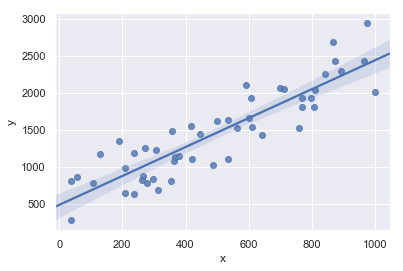

In [38]:
# Using our x and y from earlier.
# Seaborn has 2 ways to plot a regression: regplot and lmplot\

sns.regplot(x="x", y="y", data=df);

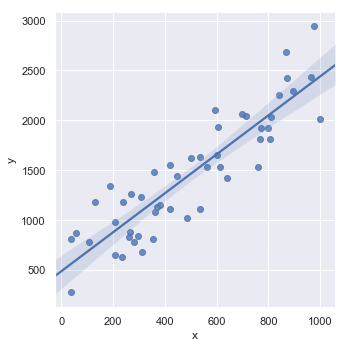

In [39]:
sns.lmplot(x="x", y="y", data=df);

As you can see, the plots are the same just a different shape.

Seaborn can even plot residuals for us:

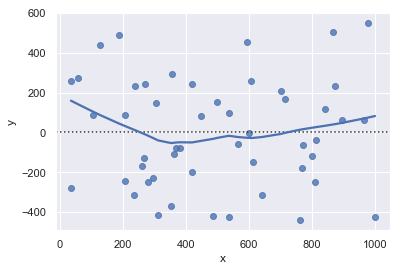

In [40]:
# lowess is a local regression line 
sns.residplot(x='x', y='y', lowess=True, data=df)

Points should be randomly distributed on the y-axis. If you see patterns then linear regression probably isn't appropriate.


Let's load some meaningful data to demonstrate some of Seaborn's more useful features. Let's use one of the sample datasets provided with Seaborn. What's that? You don't know what datasets are provided?  No problem. We'll ask Seaborn to give us a listiing!

In [41]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

<hr>
Let's have a look at the "Tips" data. This is a study of how various factors affect the tip left at a restaurant.

In [42]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
type(tips)

pandas.core.frame.DataFrame

As you can see, Seaborn automatically loads the sample data into a DataFrame.

Every Seaborn plot needs a minimum of 3 things: The column to use for X, the column to use for Y, and the name of the dataset:

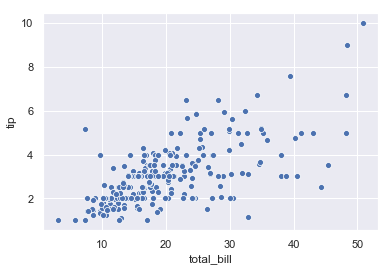

In [44]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

However, get in the habit of using the **hue** parameter. It will color the output (dots in this case) according to some third column:

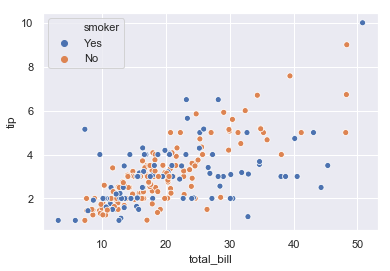

In [45]:
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=tips)

If you want even more differentiation, you can set the **style** parameter to a fourth column:

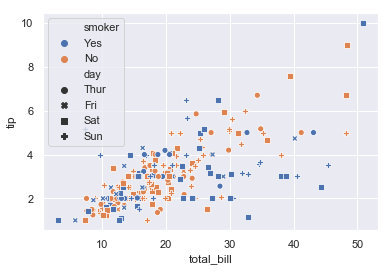

In [46]:
sns.scatterplot(x='total_bill', y='tip', hue='smoker', style='day', data=tips)

### Pair plots
Pair plots are useful for seeing relationships between variables by plotting all pairs of variables against each other:

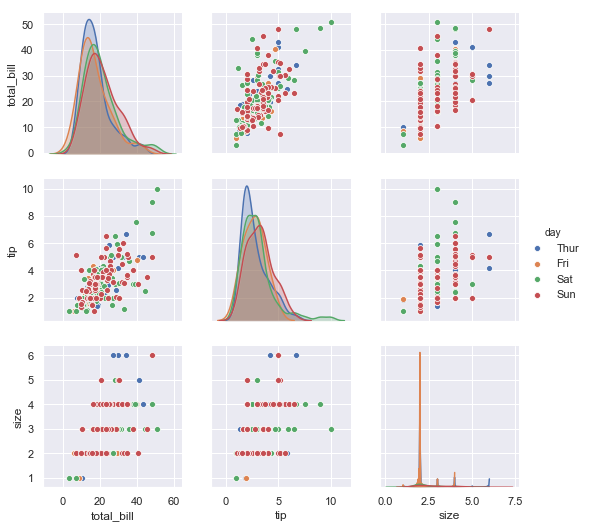

In [47]:
sns.pairplot(tips, hue='day')

### Factor Plots
Factor plots allow you to view the distribution of one variable in bins determined by another variable.

In [48]:
?sns.factorplot

Signature: sns.factorplot(*args, **kwargs)
Docstring: Deprecated; please use `catplot` instead.
File:      ~/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py
Type:      function


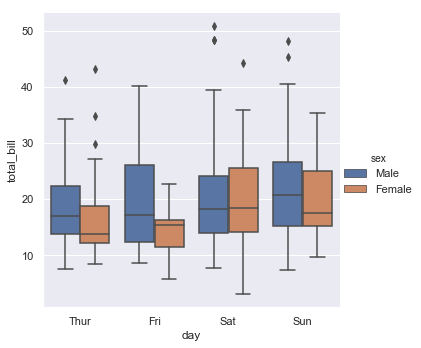

In [49]:
sns.factorplot('day', 'total_bill', 'sex', data=tips,kind='box')

### Pivot Tables and Heat Maps
The pivot_table() function of DataFrames work much like the melt-type functions, except instead of trying to reshape wide data to tidy, it helps us focus on only the columns we want. 

In the example below, we pivot the DataFrame so that the index is the day column, sex is used for table columns and the internal values are the tip. After that, we put the data in a heat map to get a graphical representation of the table. 

In [50]:
tp = tips.pivot_table(index='day', columns='sex', values='tip')
tp

sex,Male,Female
day,,
Thur,2.980333,2.575625
Fri,2.693000,2.781111
Sat,3.083898,2.801786
Sun,3.220345,3.367222


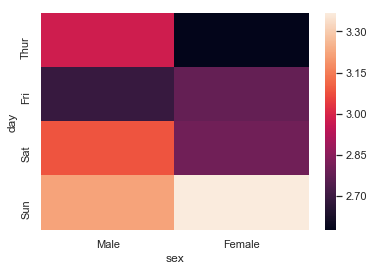

In [51]:
sns.heatmap(tp)

We can make that heat map a little more pleasing to the eye:

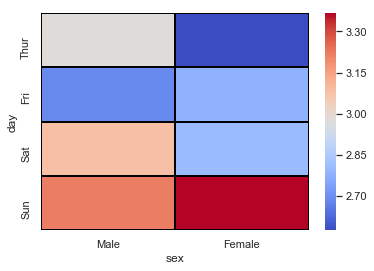

In [52]:
sns.heatmap(tp, cmap='coolwarm', linecolor='black', linewidths=1)

A better example of the heatmap might be seen in the MPG data set.

In [53]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [54]:
mpg_p = mpg.pivot_table(index='model_year', columns='origin', values='mpg')
mpg_p.head()

origin,europe,japan,usa
model_year,,,
70,25.20,25.500000,15.272727
71,28.75,29.500000,18.100000
72,22.00,24.200000,16.277778
73,24.00,20.000000,15.034483
74,27.00,29.333333,18.333333


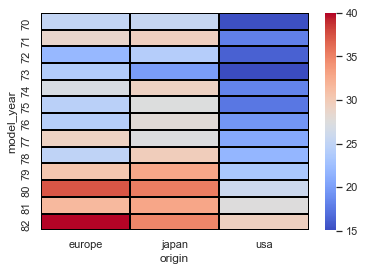

In [55]:
sns.heatmap(mpg_p,cmap='coolwarm', linecolor='black', linewidths=1)

# House Pricing Demo
Kaggle has some terrific tutorials on doing EDA (Exploratory Data Analysis) on a data set of house prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Techniques from various tutorials will be reproduced here, but students are encouraged to go read (and work through!) the original tutorials. They contain a wealth of information about the actual EDA process that won't be shown here.

Since Kaggle is interested in machine learning, the data set is divided into training and testing sets. Train and test both have 1460 rows. There are 81 attributes, 36 are quantitative and 43 categorical, plus an ID and SalePrice.

**Quantitative:** 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold.

**Qualitative:** Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities.

We'll start by loading the training data set and looking at missing values.

In [56]:
train = pd.read_csv("data/housing_train.csv")

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [57]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing values

A look at missing values (https://www.kaggle.com/dgawlik/house-prices-eda).

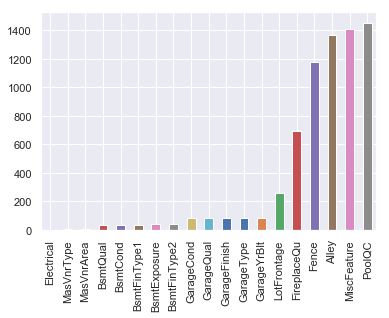

In [58]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

And another way to look at missing values (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

In [59]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Here, we can see 19 attributes have missing values. Five of them have over 50% missing. The author of the second method, above, spends time discussing what to do with the missing values and ultimately decides to remove them.

In [60]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #just checking that there's no missing data missing...

0

### Sale price


Next, let's look at SalePrice.

In [61]:
train['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Good -- no missing values and the minimum is above $0. How about we plot the distribution?

Skewness: 1.8819429948035529
Kurtosis: 6.529263049673958


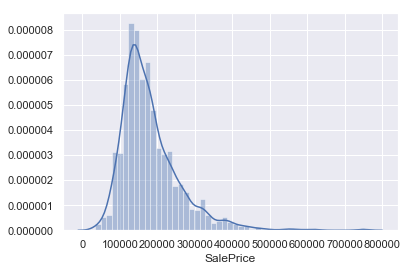

In [62]:
print(f'Skewness: {train["SalePrice"].skew()}')
print(f'Kurtosis: {train["SalePrice"].kurt()}')

sns.distplot(train['SalePrice']);

Obviously, SalePrice isn't normally distributed and would have to be transformed before regression analysis (if that was the method of choice).


We know some or many of these variables will play a big factor in sales price. Let's see if we can narrow down which ones.

In [63]:
#sns.pairplot(train)

Ooops. I forgot we have so many variables. Besides not being readable, it took a long time, too. I wouldn't recommend doing this one on a slow computer.

### Correlation Matrix and Heatmap

OK, how about a correlation matrix and heatmap?

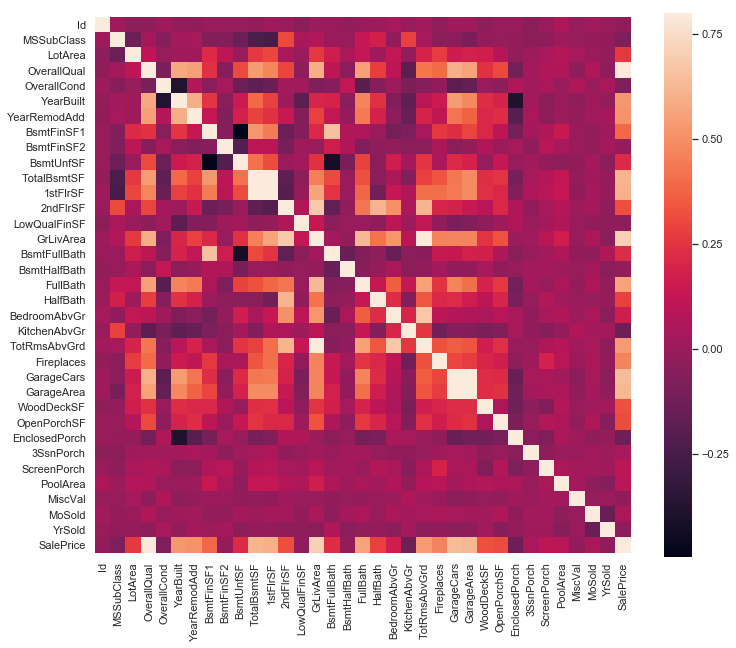

In [64]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True)

Several of the variables have strong correlation. Probably the most important to look at are the ones that correlate with SalePrice. Let's do that next.

<function matplotlib.pyplot.show(*args, **kw)>

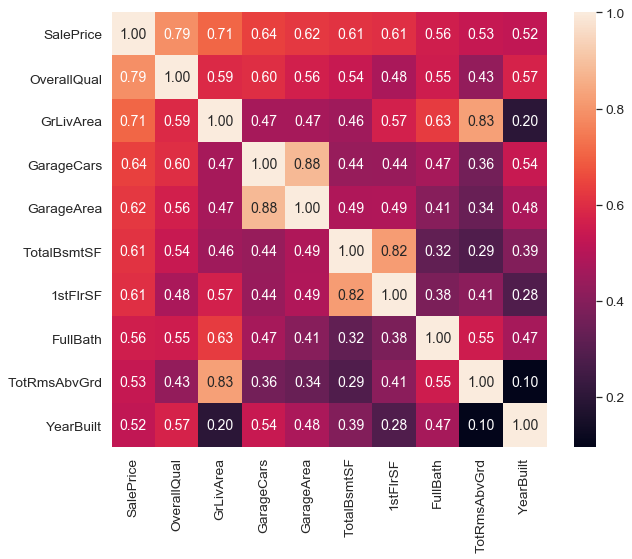

In [65]:
# SalePrice correlation matrix
k = 10 # number of vars for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14},yticklabels=cols.values, xticklabels=cols.values)
plt.show

Here, we can see that there are correlations between GarageCars and GarageArea, TotalBsmtSF and 1stFlrSF, GrLivArea with TotRmsAbvGrd, etc. Based on **logic**, we can make some decisions about which features to use.

* OverallQual, GrLivArea, TotalBsmtSF are clearly correlated with SalesPrice.
* GarageCars is a function of GarageArea so probably only need one of them.
* TotalBsmtSF and 1stFlrSF should be similar if not identical. Keep one of them.
* TotRmsAbvGrd will be highly correlated to GrLivArea - probably don't need both.

Let's look at pairplots of these variables.

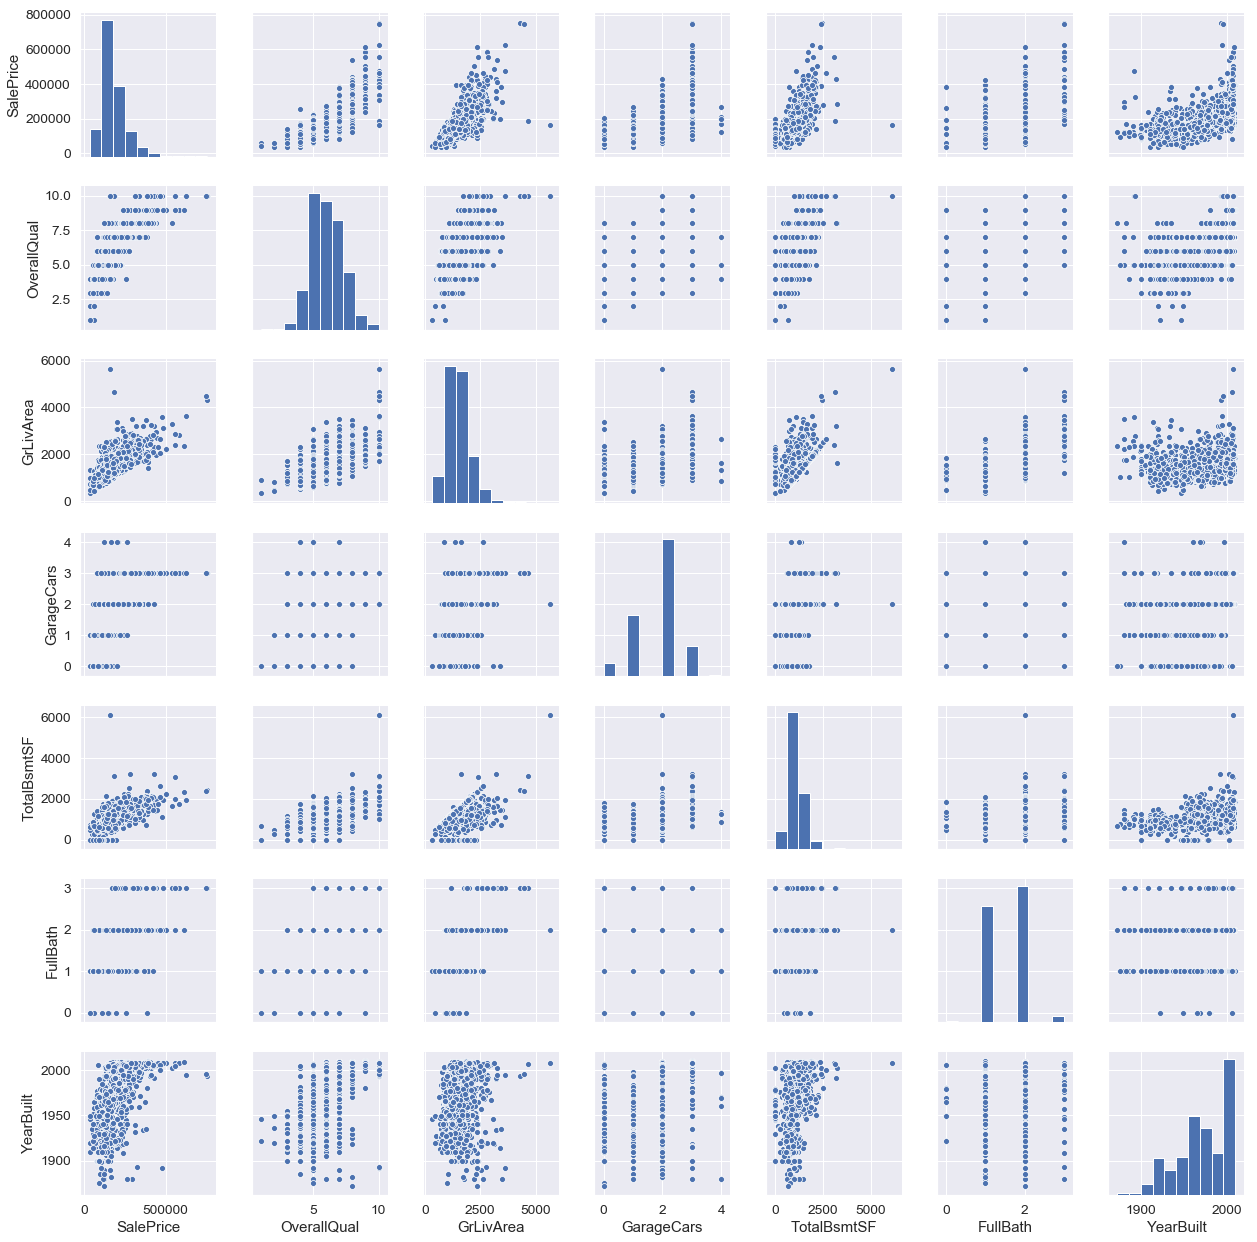

In [66]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

(from https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/code)

<hr>

https://www.kaggle.com/dgawlik/house-prices-eda  demonstrates a method of checking qualitative variable influence by partitioning SalePrice for each variable based on category values then checking distribution with an ANOVA test. If a variable has minor impact then set means should be equal. Decreasing p-value is a sign of increasing diversity in partitions.

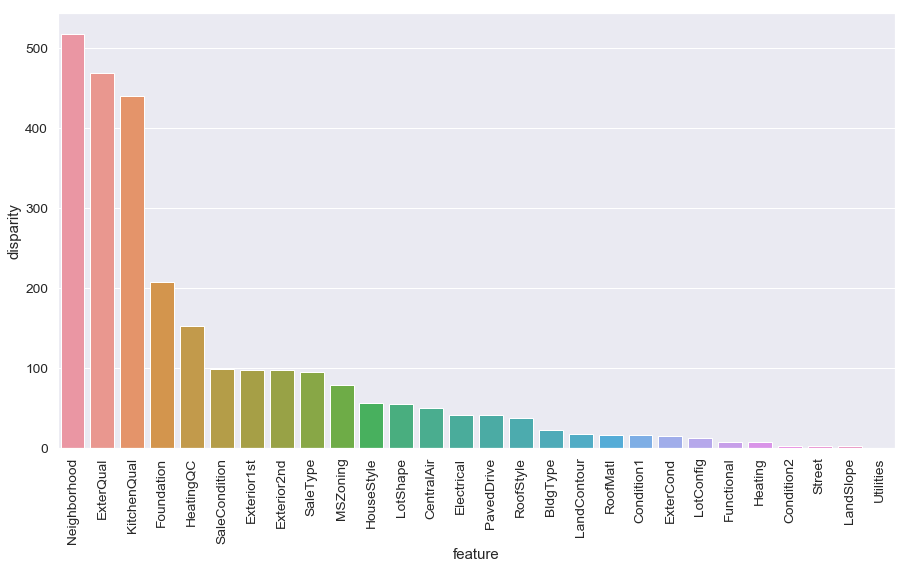

In [67]:
import scipy.stats as stats

qualitative = [f for f in train.columns if train.dtypes[f] == 'object'] # List comprehension

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)

plt.figure(figsize=(15,8)) # Set plot size so it is readable!

sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [68]:
train[qualitative][:5]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


### Encode qualitative features

The encode() function below (from https://www.kaggle.com/dgawlik/house-prices-eda) encodes the "non-numeric" features **based on the mean of SalePrice**.

In [69]:

def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
 

The magic happens with this line: 

`ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']`

Below is what that line does outside of the function:

In [70]:
train[["LotShape", 'SalePrice']].groupby("LotShape").mean()['SalePrice']

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164751.847403
Name: SalePrice, dtype: float64

In [71]:
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'PavedDrive_E', 'SaleType_E', 'SaleCondition_E']


In [72]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Foundation_E,Heating_E,HeatingQC_E,CentralAir_E,Electrical_E,KitchenQual_E,Functional_E,PavedDrive_E,SaleType_E,SaleCondition_E
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,6.0,6.0,5.0,2.0,5.0,3.0,7.0,3.0,5.0,5.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,3.0,6.0,5.0,2.0,5.0,2.0,7.0,3.0,5.0,5.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,6.0,6.0,5.0,2.0,5.0,3.0,7.0,3.0,5.0,5.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2.0,6.0,4.0,2.0,5.0,3.0,7.0,3.0,5.0,2.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,6.0,6.0,5.0,2.0,5.0,3.0,7.0,3.0,5.0,5.0


Notice the column Foundation_e. We can see that there are at least 6 kinds of foundation with the 2nd and 4th rows having a different type than the others.

The author goes on to use this encoding in a **Spearman correlation** (https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) to help determine importance of features.

In [73]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features] # List comprehension
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

In [74]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object'] # List comprehension
quantitative.remove('SalePrice')
quantitative.remove('Id')

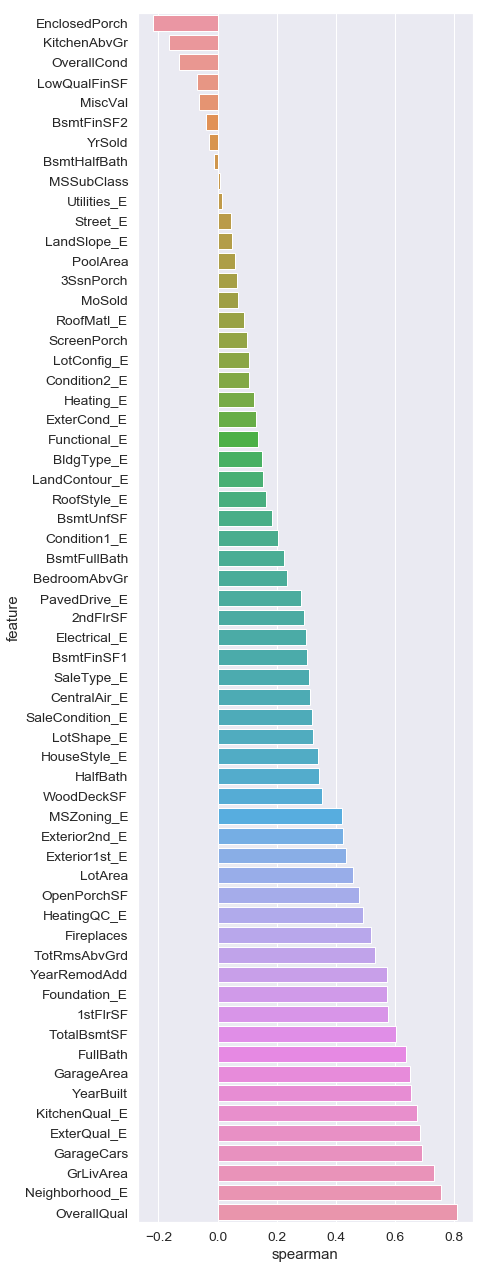

In [75]:
features = quantitative + qual_encoded
spearman(train, features)

### Testing for Normality

At this point, I'll go ahead and delete the missing values then we will use a couple of simple tools to check distribution:
* Histogram - This will show kurtosis and skewness
* Normal Probability Plot - The data distribution should follow the diagonal line

In [76]:
from scipy.stats import norm

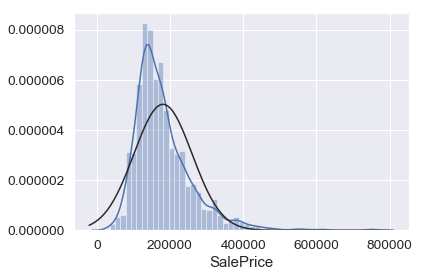

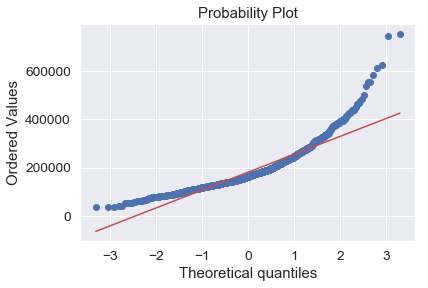

In [77]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

That's a problem. Let's try a transform.

In [78]:
#data transformation
train['SalePrice'] = np.log(train['SalePrice'])

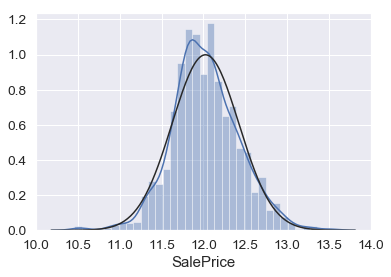

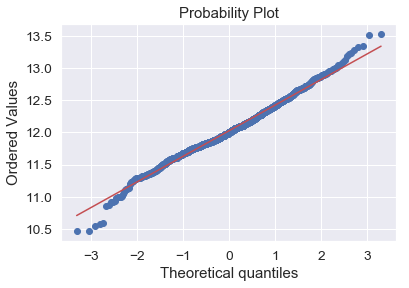

In [79]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

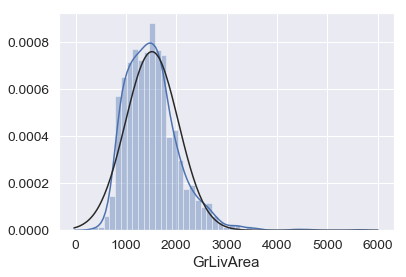

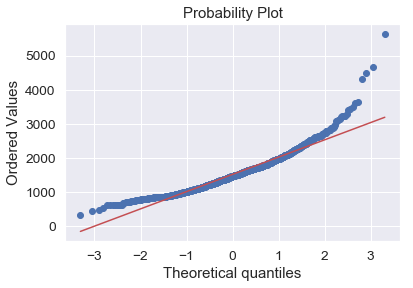

In [80]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [81]:
#data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])

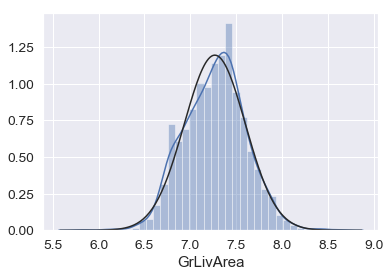

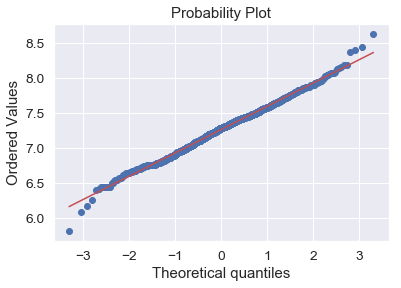

In [82]:
#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

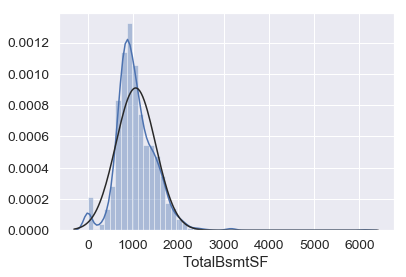

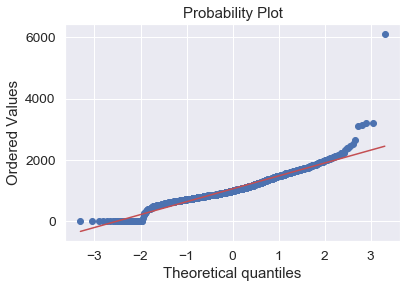

In [83]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

Now we run into a problem. TotalBsmtSF shows some skewness but it also has some zero values -- presumably meaning the house has no basement. We can't use a log transform on the zero values. The tutorial author presents the idea of creating a new binary column to represent whether or not the house has a basement then using the log transform on the "haves". 

In [84]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [85]:
#transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

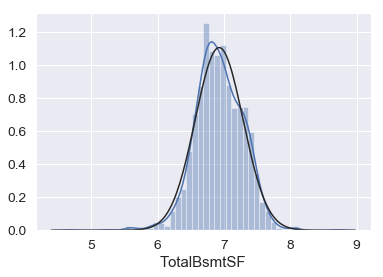

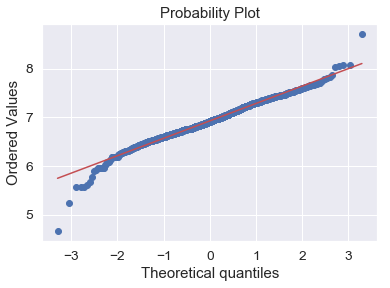

In [86]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Linear Regression

There is a not more we could do to help normalize the variables but let's put the quantitative variables we identified earlier and put them into a Linear Regression and see how we do.

In [87]:
# cols was used to make pairplots of the quantitative features.
# We can use that to create a new dataset for our regression
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']

In [88]:
# X is traditionally used to identify the data to be modeled
X_train = train[cols[1:]]
X_train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,7,7.444249,2,6.752270,2,2003
1,6,7.140453,2,7.140453,2,1976
2,7,7.487734,2,6.824374,2,2001
3,7,7.448334,3,6.628041,1,1915
4,8,7.695303,3,7.043160,2,2000


In [89]:
# y is traditionally the result
y_train = train['SalePrice']

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
reg = LinearRegression()

In this step we fit the model to the data. This is the "learning" step of machine learning.

In [92]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The next step will test our model using the `predict()` function. We can then run evaluative functions to see how we did. 

**Note:** We usually use a different set of data (or divide the data prior to fitting) for the testing phase. In this case, the Kaggle data does not have SalePrice included. We are supposed to run our model and submit it to them to check accuracy. Therefore, we will just re-use our training data. Not ideal, but good enough for this demonstration.

In [93]:
pred = reg.predict(X_train)

Below are a couple of popular tests for Linear Regression. 
* **Mean Square Error** is the mean of squared residuals. This means that each prediction is compared to the known answer and the difference is squared. Then the mean of all these is calculated. Closer to 0 means better correlation.

* **r2 score** is the (total variance explained by model) / (total variance). Closer to 1 means better correlation.

In [94]:
print(f'Mean squared error: {mean_squared_error(y_train, pred)}')

Mean squared error: 0.029309124510786044


In [95]:
print(f'r2 score (1 is perfect): {r2_score(y_train, pred)}')

r2 score (1 is perfect): 0.8163148812111712
